## Многоклассовая классификация

### Выполнил: Андрей Фролов 23.М08

Описание датасета: 

- Age: Represents the age of the person
- Annual_Income: Represents the annual income of the person
- Monthly_Inhand_Salary: Represents the monthly base salary of a person
- Num_Bank_Accounts:Represents the number of bank accounts a person holds
- Num_Credit_Card: Represents the number of other credit cards held by a person
- Interest_Rate: Represents the interest rate on credit card
- Num_of_Loan: Represents the number of loans taken from the bank
- Delay_from_due_date: Represents the average number of days delayed from the payment date
- Num_of_Delayed_Payment: Represents the average number of payments delayed by a person
- Changed_Credit_Limit: Represents the percentage change in credit card limit
- Num_Credit_Inquiries: Represents the number of credit card inquiries
- Credit_Mix: Represents the classification of the mix of credits
- Outstanding_Debt: Represents the remaining debt to be paid (in USD)
- Credit_Utilization_Ratio: Represents the utilization ratio of credit card
- Credit_History_Age: Represents the age of credit history of the person
- Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
- Total_EMI_per_month: Represents the monthly EMI payments (in USD)
- Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
- Monthly_Balance: Represents the monthly balance amount of the customer (in USD)
- Credit_Score: Represents the bracket of credit score (Poor, Standard, Good)

Необходимо решить задачу классификации и научиться предсказывать целовой признак credit_score, кредитный рейтинг пользователя

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [20]:
df = pd.read_csv('/Users/sergioramos4/Downloads/Score.csv')
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.0,7.0,4.0,26.822620,265.0,No,80.415295,312.494089,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
1,3.0,7.0,4.0,31.944960,265.0,No,118.280222,284.629162,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
2,3.0,7.0,4.0,28.609352,267.0,No,81.699521,331.209863,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
3,5.0,4.0,4.0,31.377862,268.0,No,199.458074,223.451310,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
4,6.0,4.0,4.0,24.797347,269.0,No,41.420153,341.489231,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949


## Первичный анализ признаков

In [3]:
df.isnull().sum()

Delay_from_due_date         0
Num_of_Delayed_Payment      0
Num_Credit_Inquiries        0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
Credit_Mix                  0
Payment_Behaviour           0
Age                         0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Monthly_Inhand_Salary       0
Changed_Credit_Limit        0
Outstanding_Debt            0
Total_EMI_per_month         0
dtype: int64

Посмотрим статистику по целевому признаку

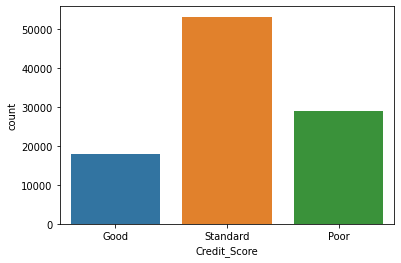

In [5]:
sns.countplot(df['Credit_Score'])

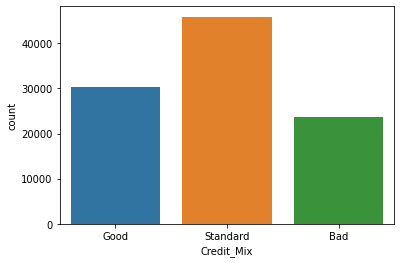

In [46]:
sns.countplot(df['Credit_Mix'])

Большинство кредитов имеют стандартный рейтинг, при этом, если разделить кредиты по заемщику, ситуация чуть улучшается.

In [4]:
df.groupby('Credit_Score').mean()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
Credit_Score,,,,,,,,,,,,,,,,,
Good,10.968187,8.576671,3.275823,32.685381,284.684172,251.032328,478.634791,36.348314,65185.969674,3.439825,4.141895,7.664198,2.202211,5402.352634,7.105089,801.158012,111.371825
Poor,29.753243,15.853146,8.157720,31.984639,169.949945,158.948826,345.492038,31.143404,40564.611896,6.527218,6.624224,20.191114,4.757382,3378.154517,11.045690,2081.965605,111.400689
Standard,19.769986,13.559766,5.312706,32.313698,227.718339,193.362387,409.839152,33.396132,50991.626559,5.383977,5.404053,13.754483,3.313308,4239.054020,11.147020,1278.732955,100.436403


<Axes: xlabel='Age', ylabel='Monthly_Inhand_Salary'>

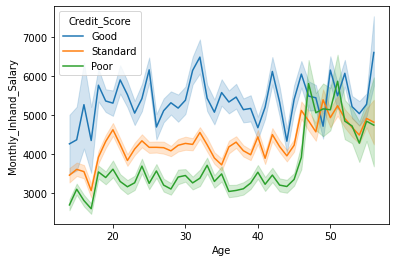

In [9]:
sns.lineplot(data=df, x="Age", y="Monthly_Inhand_Salary", hue="Credit_Score")

<Axes: xlabel='Age', ylabel='Annual_Income'>

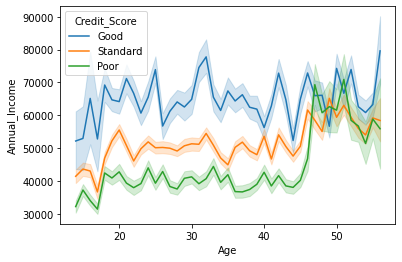

In [6]:
sns.lineplot(data=df, x='Age', y='Annual_Income', hue="Credit_Score")

До полувекового юбилея четко прослеживается разница в зарплате между заемщиками с хорошим и бедным кредитным рейтингом, однако в предпенсионном возрасте границы стираются.

<Axes: xlabel='Payment_of_Min_Amount', ylabel='count'>

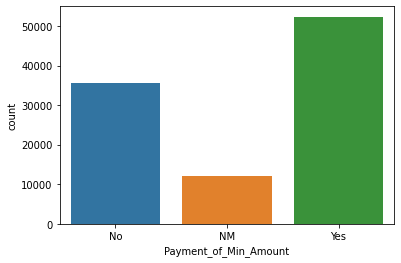

In [8]:
sns.countplot(df['Payment_of_Min_Amount'])

In [4]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      33912
High_spent_Medium_value_payments    26728
High_spent_Large_value_payments     16744
Low_spent_Medium_value_payments     10304
High_spent_Small_value_payments      6512
Low_spent_Large_value_payments       5760
Name: Payment_Behaviour, dtype: int64

<Axes: xlabel='Payment_Behaviour', ylabel='count'>

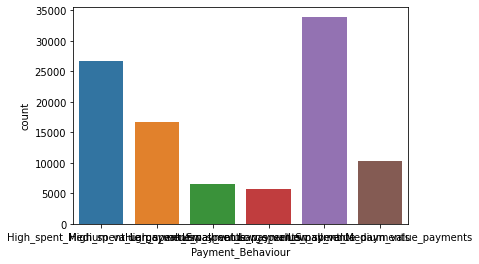

In [32]:
sns.countplot(df['Payment_Behaviour'])

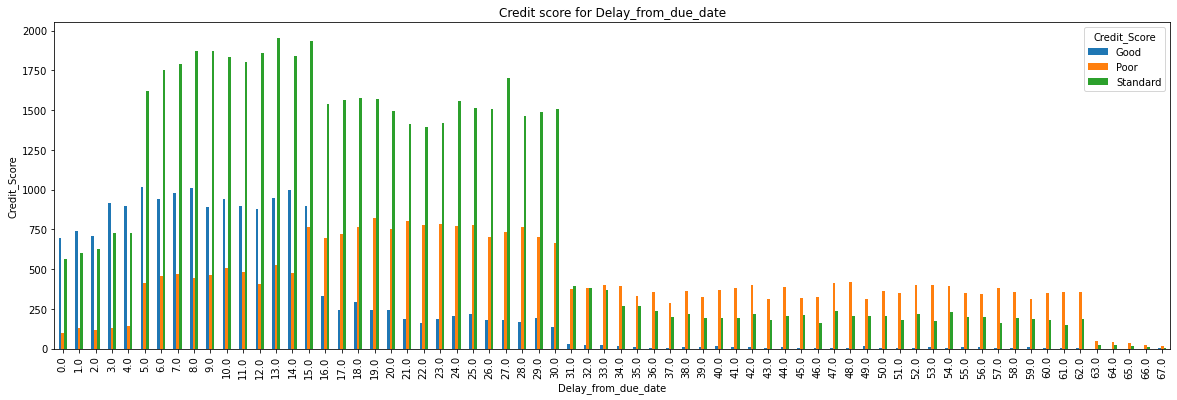

In [7]:
pd.crosstab(df.Delay_from_due_date,df.Credit_Score).plot(kind="bar", figsize=(20, 6))
plt.title('Credit score for Delay_from_due_date')
plt.xlabel('Delay_from_due_date')
plt.ylabel('Credit_Score')
plt.show()

sns.lineplot(data=df, x="Delay_from_due_date", y="Monthly_Inhand_Salary", hue="Credit_Score")

Хорошо прослеживается изменение кредитного рейтинга в зависимости от времени просрочки платежа

- заемщики с хорошим рейтингом практически не задерживают платеж более чем на 2 недели.
- заемщики со стандартным рейтингом укладываются в месяц.
- бедный рейтинг допускает задержку в 2 месяца

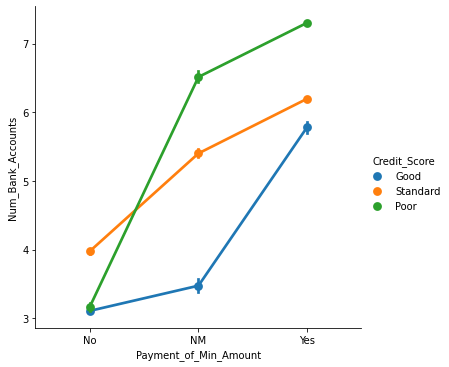

In [7]:
sns.factorplot('Payment_of_Min_Amount', 'Num_Bank_Accounts', hue='Credit_Score', data=df)

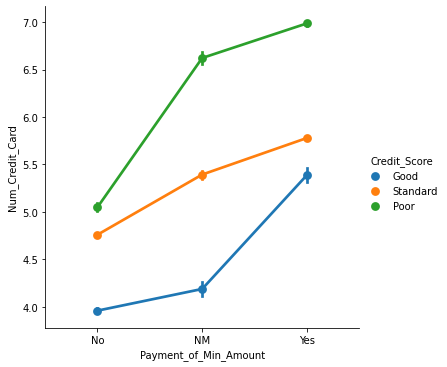

In [6]:
sns.factorplot('Payment_of_Min_Amount', 'Num_Credit_Card', hue='Credit_Score', data=df)

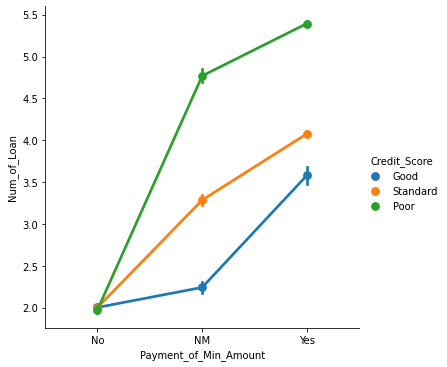

In [7]:
sns.factorplot('Payment_of_Min_Amount', 'Num_of_Loan', hue='Credit_Score', data=df)

Люди с хорошим кредитным рейтингом обходятся меньшим количеством кредитов, кредитных карт и банковских аккаунтов.

<Axes: xlabel='Interest_Rate', ylabel='Count'>

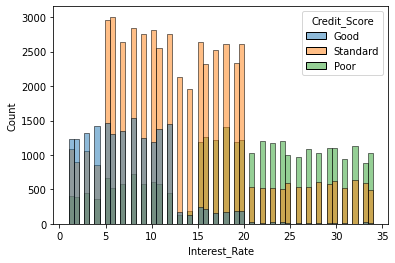

In [32]:
sns.histplot(x='Interest_Rate', hue='Credit_Score', data=df)

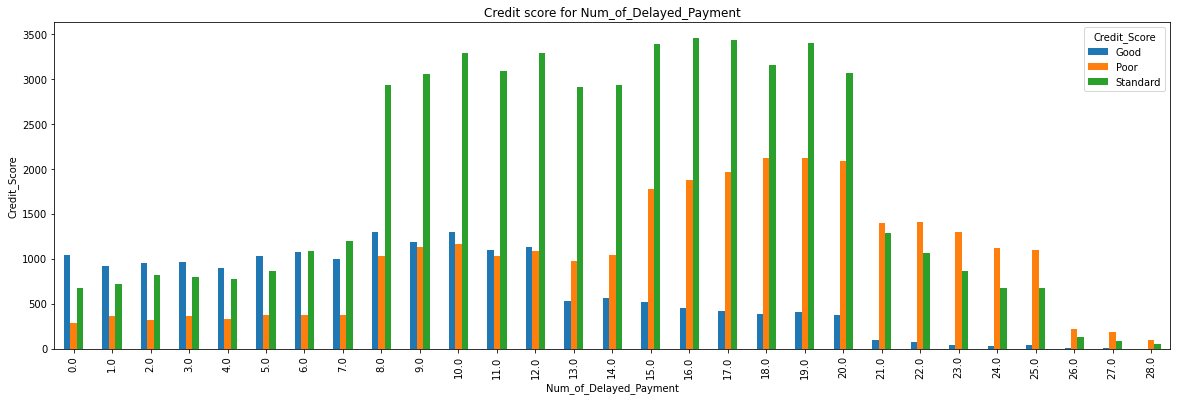

In [36]:
pd.crosstab(df.Num_of_Delayed_Payment,df.Credit_Score).plot(kind="bar", figsize=(20, 6))
plt.title('Credit score for Num_of_Delayed_Payment')
plt.xlabel('Num_of_Delayed_Payment')
plt.ylabel('Credit_Score')
plt.show()

Хорошо прослеживается изменение кредитного рейтинга в зависимости от количества просроченных платежей

- заемщики с хорошим рейтингом зачастую имеют не более 12.
- основная масса заемщиков со стандартным рейтингом укладываются до 20.
- бедный рейтинг допускает 25 штук.

<Axes: xlabel='Changed_Credit_Limit', ylabel='Count'>

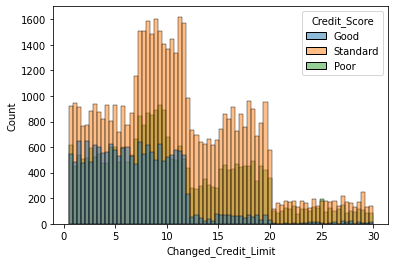

In [40]:
sns.histplot(x='Changed_Credit_Limit', hue='Credit_Score', data=df)

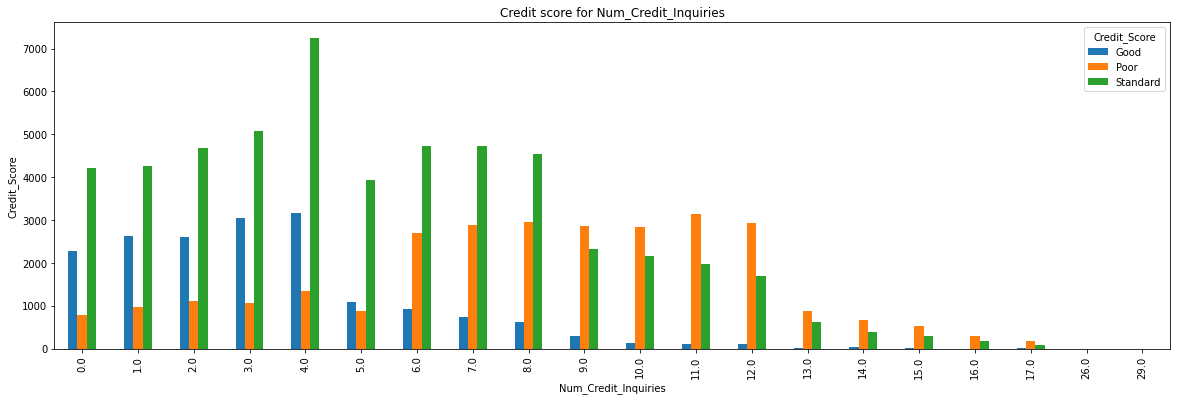

In [44]:
pd.crosstab(df.Num_Credit_Inquiries,df.Credit_Score).plot(kind="bar", figsize=(20, 6))
plt.title('Credit score for Num_Credit_Inquiries')
plt.xlabel('Num_Credit_Inquiries')
plt.ylabel('Credit_Score')
plt.show()

<Axes: xlabel='Outstanding_Debt', ylabel='Count'>

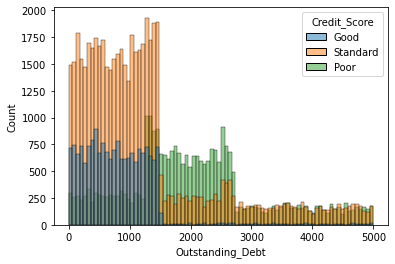

In [48]:
sns.histplot(x='Outstanding_Debt', hue='Credit_Score', data=df)

<Axes: xlabel='Credit_Utilization_Ratio', ylabel='Count'>

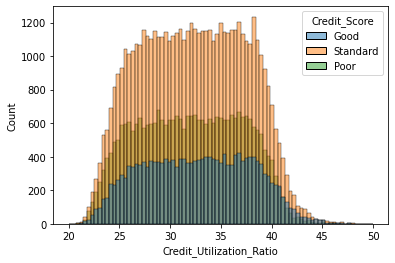

In [50]:
sns.histplot(x='Credit_Utilization_Ratio', hue='Credit_Score', data=df)

<Axes: xlabel='Credit_History_Age', ylabel='Count'>

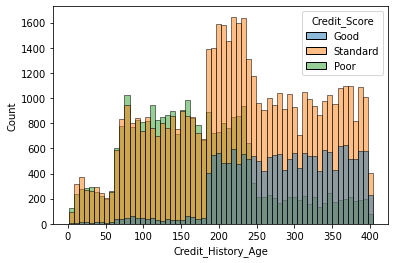

In [52]:
sns.histplot(x='Credit_History_Age', hue='Credit_Score', data=df)

Чем беднее человек, тем более короткий срок у его займов.

<Axes: xlabel='Total_EMI_per_month', ylabel='Count'>

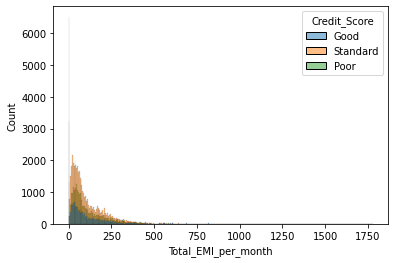

In [55]:
sns.histplot(x='Total_EMI_per_month', hue='Credit_Score', data=df)

<Axes: xlabel='Amount_invested_monthly', ylabel='Count'>

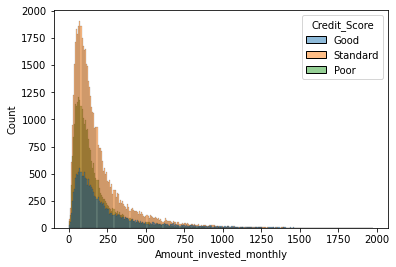

In [57]:
sns.histplot(x='Amount_invested_monthly', hue='Credit_Score', data=df)

<Axes: xlabel='Monthly_Balance', ylabel='Count'>

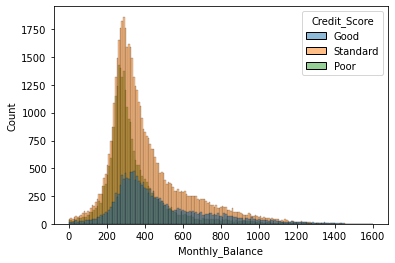

In [59]:
sns.histplot(x='Monthly_Balance', hue='Credit_Score', data=df)

### Преобразование категориальных признаков

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.Credit_Score = le.fit_transform(df.Credit_Score)
df.Credit_Mix = le.fit_transform(df.Credit_Mix)
df.Payment_of_Min_Amount = le.fit_transform(df.Payment_of_Min_Amount)
df.Payment_Behaviour = le.fit_transform(df.Payment_Behaviour)

### Корреляция признаков

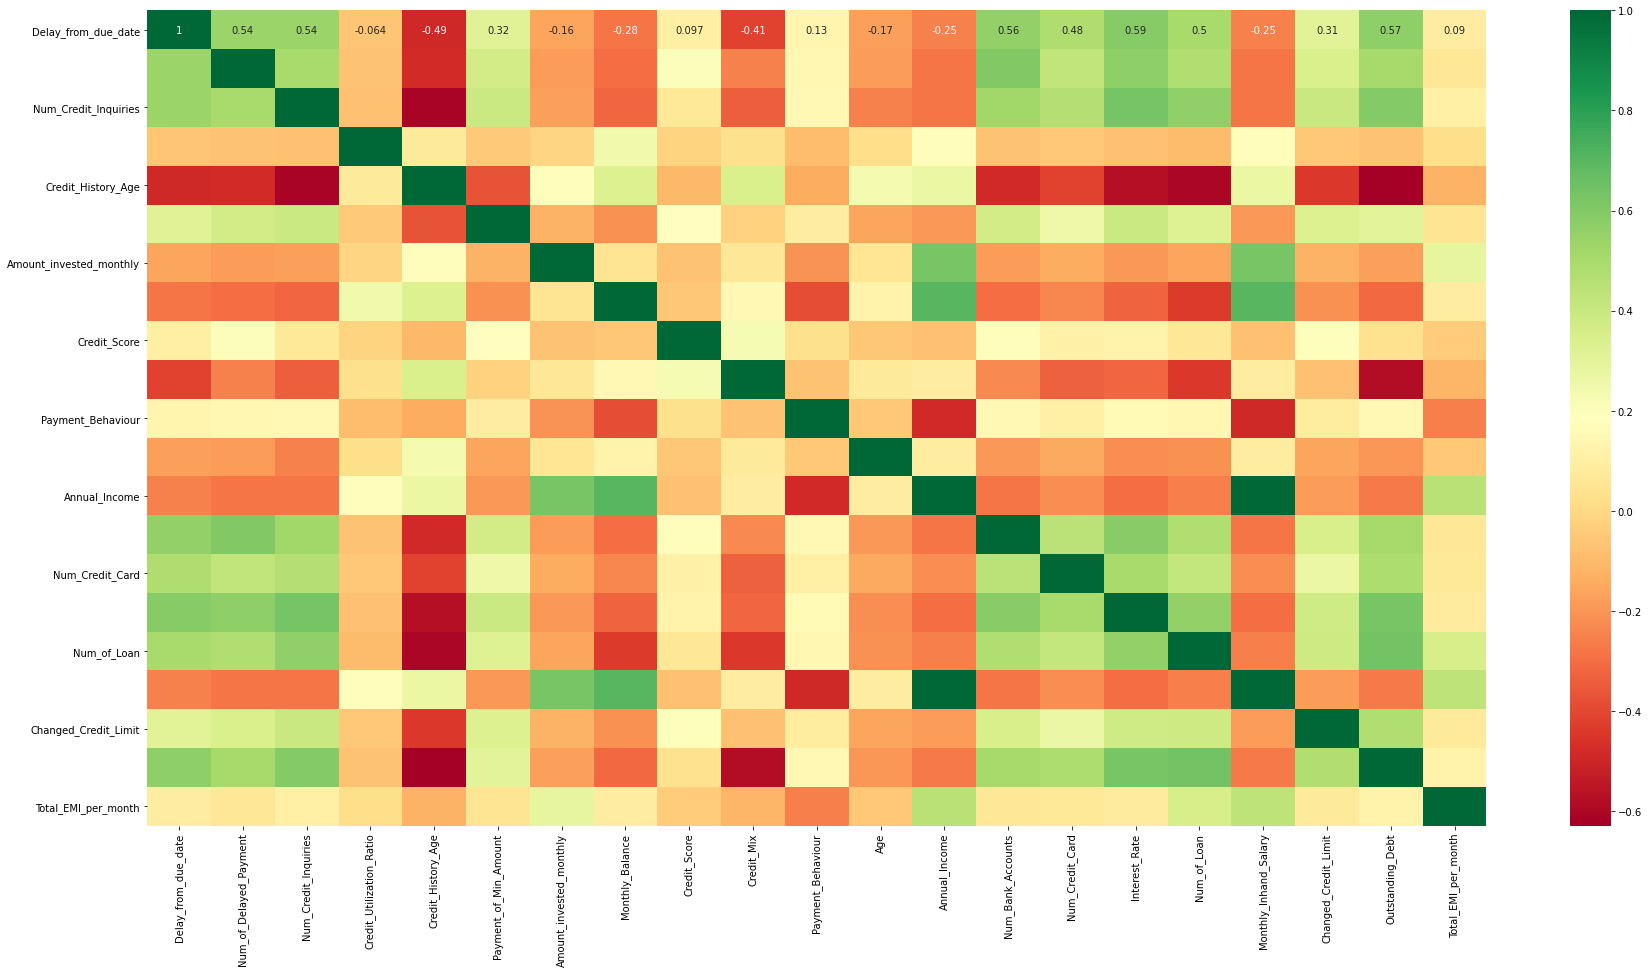

In [22]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(30, 15)
plt.show()

### Распределение данных

In [4]:
from sklearn.model_selection import train_test_split

y = df["Credit_Score"]
x = df.drop(columns=["Credit_Score"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Масштабирование признаков

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x.columns)
x_train.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Mix,Payment_Behaviour,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,-0.007758,0.426622,0.830170,-1.589744,-0.530224,0.859086,-0.641313,0.181202,-1.516041,-1.338157,0.811135,-0.109594,0.628702,-0.257911,1.767448,1.009743,-0.045275,1.148960,2.513257,0.225535
1,-0.479842,-0.370588,0.571618,-1.007701,1.033325,0.859086,-0.194611,-0.094009,0.966752,1.161087,-0.764977,-0.503715,0.243094,-1.224347,-0.062735,-1.036812,-0.411089,0.066502,-0.121601,-0.684112
2,-1.356570,-1.327239,-1.238244,-0.167707,0.011004,-2.028014,1.526937,-0.302120,-0.274645,0.161389,1.367410,0.404942,-0.142514,0.708524,-0.749053,-1.446123,0.406272,-0.359132,-1.047675,-0.840495
3,-0.007758,0.745506,0.054515,-1.872656,-0.520202,0.859086,-0.640310,-0.669691,0.966752,-0.838308,1.089273,-0.811952,1.014310,-0.257911,0.509197,0.191121,-0.752447,0.277788,0.503862,-0.505471
4,0.127123,0.586064,0.054515,-0.587474,-1.271908,-2.028014,-0.259864,0.127548,0.966752,-0.838308,-1.413965,-0.110275,1.014310,-1.224347,-0.405894,-1.036812,-0.192623,0.052722,-1.007994,-0.566550


### Подбор наилучших признаков

In [6]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

rfecv = RFECV(estimator=LinearRegression())
rfecv.fit(x, y)

print("Наилучшее количество признаков -", rfecv.n_features_)
print("Наиболее подходящие признаки -", x_train.columns[rfecv.support_])

Наилучшее количество признаков - 18
Наиболее подходящие признаки - Index(['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_Mix', 'Payment_Behaviour', 'Age', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Total_EMI_per_month'],
      dtype='object')


In [7]:
unsuitableParams = set(df.columns) - set(['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_Mix', 'Payment_Behaviour', 'Age', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Total_EMI_per_month', 'Credit_Score'])

x_train = x_train.drop(columns=unsuitableParams)
x_test = x_test.drop(columns=unsuitableParams)
y_train = y_train.drop(columns=unsuitableParams)
y_test = y_test.drop(columns=unsuitableParams)

### Подбор гиперпараметров

In [8]:
from sklearn.model_selection import GridSearchCV

def print_bestParams(gscv):
    print("best estimator: " + str(gscv.best_estimator_))
    print("best params: " + str(gscv.best_params_))
    print('best score:', gscv.best_score_)

In [9]:
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold

### Logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': np.arange(1e-05, 5, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gscv = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=StratifiedKFold(5), refit='Accuracy',
                   verbose=5, n_jobs=-1)
gscv.fit(x_train, y_train)
print_bestParams(gscv)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
best estimator: LogisticRegression(C=3.7000100000000002)
best params: {'C': 3.7000100000000002}
best score: 0.6497693044241089


### SVM

In [20]:
from sklearn.svm import LinearSVC

param_grid = {"C": [0.1, 0.25, 0.5, 0.75, 1, 2]}

gscv = GridSearchCV(estimator=LinearSVC(random_state=11), cv=StratifiedKFold(5),
                        param_grid=param_grid,
                       verbose=5, n_jobs=-1)

gscv.fit(x_train, y_train)
print_bestParams(gscv)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
best estimator: LinearSVC(C=0.5, random_state=11)
best params: {'C': 0.5}
best score: 0.6369134168536518


### KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = [{"n_neighbors": [1, 3, 5, 7],
               "weights": ['distance', 'uniform']}]
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gscv = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=StratifiedKFold(5), verbose=5,
                        scoring=scoring, refit='Accuracy', n_jobs=-1)

gscv.fit(x_train, y_train)
print_bestParams(gscv)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
best estimator: KNeighborsClassifier(n_neighbors=7, weights='distance')
best params: {'n_neighbors': 7, 'weights': 'distance'}
best score: 0.7349679350890737


### Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

param_grid = [{"var_smoothing": np.logspace(0, -10, num=100)}]
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gscv = GridSearchCV(estimator=GaussianNB(), cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=23),
                      scoring=scoring, return_train_score=True,
                      param_grid=param_grid, refit='Accuracy',
                      n_jobs=-1)

gscv.fit(x_train, y_train)
print_bestParams(gscv)

best estimator: GaussianNB(var_smoothing=3.5111917342151347e-06)
best params: {'var_smoothing': 3.5111917342151347e-06}
best score: 0.6413032295440962


### Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

param_grid = [{"criterion": ["gini", "entropy", "log_loss"],
               "splitter": ["best", "random"],
               "max_depth": [2, 3, 4, 5, 10, 20],
               "min_samples_split": [2, 4, 5, 10],
               "min_samples_leaf": [1, 2, 4, 6],
               "max_features": [2, 4, 6, 8]}]

gscv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), cv=StratifiedKFold(5),
                       param_grid=param_grid, n_jobs=-1)
gscv.fit(x_train, y_train)
print_bestParams(gscv)

best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=6,
                       min_samples_split=5, random_state=42, splitter='random')
best params: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
best score: 0.721260857722224


## Тесты

In [21]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

results = {}
times = {}

## OneVsRest

### LogisticRegression

In [26]:
from sklearn.multiclass import OneVsRestClassifier

ovr_logreg = OneVsRestClassifier(LogisticRegression(C=3.7, random_state=19)).fit(x_train, y_train)
result = accuracy_score(y_test, ovr_logreg.predict(x_test))
time = cross_validate(ovr_logreg, x_train, y_train, cv=5)["fit_time"].mean()

results["OVR_LOGREG"] = result
times["OVR_LOGREG"] = time

print(f"result: {result}")
print(f"time: {time}")

result: 0.6388577318337527
time: 0.259797191619873


### SVM

In [30]:
ovr_svm = OneVsRestClassifier(LinearSVC(C=0.5, random_state=19)).fit(x_train, y_train)
result = accuracy_score(y_test, ovr_svm.predict(x_test))
time = cross_validate(ovr_svm, x_train, y_train, cv=5)["fit_time"].mean()

results["OVR_SVM"] = result
times["OVR_SVM"] = time

print(f"result {result}")
print(f"time {time}")

OVR_SVM accuracy 0.6337648164428411
OVR_SVM time 31.09323616027832


### KNN

In [31]:
ovr_knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=7)).fit(x_train, y_train)
result = accuracy_score(y_test, ovr_knn.predict(x_test))
time = cross_validate(ovr_knn, x_train, y_train, cv=5)["fit_time"].mean()

results["OVR_KNN"] = result
times["OVR_KNN"] = time

print(f"result {result}")
print(f"time {time}")

result 0.7244368993846061
time 0.04754242897033691


### Naive Bayes

In [32]:
ovr_nb = OneVsRestClassifier(GaussianNB(var_smoothing=3.5)).fit(x_train, y_train)
result = accuracy_score(y_test, ovr_nb.predict(x_test))
time = cross_validate(ovr_nb, x_train, y_train, cv=5)["fit_time"].mean()

results["OVR_NB"] = result
times["OVR_NB"] = time

print(f"result {result}")
print(f"time {time}")

result 0.5970533846666869
time 0.07416491508483887


### Decision Tree

In [34]:
ovr_dt = OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=20,
                                                    max_features=6, min_samples_leaf=1,
                                                    min_samples_split=5, splitter='random', random_state=19)).fit(x_train, y_train)
result = accuracy_score(y_test, ovr_dt.predict(x_test))
time = cross_validate(ovr_dt, x_train, y_train, cv=5)["fit_time"].mean()

results["OVR_DT"] = result
times["OVR_DT"] = time

print(f"result {result}")
print(f"time {time}")

result 0.7357443841513324
time 0.1853487491607666


## OneVsOne

### LogisticRegression

In [35]:
from sklearn.multiclass import OneVsOneClassifier

ovo_logreg = OneVsOneClassifier(LogisticRegression(C=3.7, random_state=19)).fit(x_train, y_train)
result = accuracy_score(y_test, ovo_logreg.predict(x_test))
time = cross_validate(ovo_logreg, x_train, y_train, cv=5)["fit_time"].mean()

results["OVO_LOGREG"] = result
times["OVO_LOGREG"] = time

print(f"result {result}")
print(f"time {time}")

result 0.648922302725316
time 0.23736143112182617


### SVM

In [36]:
ovo_svm = OneVsOneClassifier(LinearSVC(C=0.5, random_state=19)).fit(x_train, y_train)
result = accuracy_score(y_test, ovo_svm.predict(x_test))
time = cross_validate(ovo_svm, x_train, y_train, cv=5)["fit_time"].mean()

results["OVO_SVM"] = result
times["OVO_SVM"] = time

print(f"result {result}")
print(f"time {time}")

result 0.6454967108254767
time 18.691869068145753


### KNN

In [38]:
ovo_knn = OneVsOneClassifier(KNeighborsClassifier(n_neighbors=7)).fit(x_train, y_train)
result = accuracy_score(y_test, ovo_knn.predict(x_test))
time = cross_validate(ovo_knn, x_train, y_train, cv=5)["fit_time"].mean()

results["OVO_KNN"] = result
times["OVO_KNN"] = time

print(f"result {result}")
print(f"time {time}")

result 0.7241640646315215
time 0.040569496154785153


### Naive Bayes

In [39]:
ovo_nb = OneVsOneClassifier(GaussianNB(var_smoothing=3.5)).fit(x_train, y_train)
result = accuracy_score(y_test, ovo_nb.predict(x_test))
time = cross_validate(ovo_nb, x_train, y_train, cv=5)["fit_time"].mean()

results["OVO_NB"] = result
times["OVO_NB"] = time

print(f"result {result}")
print(f"time {time}")

result 0.6028132294540274
time 0.07151565551757813


### Decision Tree

In [40]:
ovo_dt = OneVsOneClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=20,
                                                    max_features=6, min_samples_leaf=1,
                                                    min_samples_split=5, splitter='random', random_state=19)).fit(x_train, y_train)
result = accuracy_score(y_test, ovo_dt.predict(x_test))
time = cross_validate(ovo_dt, x_train, y_train, cv=5)["fit_time"].mean()

results["OVO_DT"] = result
times["OVO_DT"] = time

print(f"result {result}")
print(f"time {time}")

result 0.7276806014490557
time 0.1346954345703125


## OutputCode

### LogisticRegression

In [41]:
from sklearn.multiclass import OutputCodeClassifier

oc_logreg = OutputCodeClassifier(LogisticRegression(C=3.7, random_state=19)).fit(x_train, y_train)
result = accuracy_score(y_test, oc_logreg.predict(x_test))
time = cross_validate(oc_logreg, x_train, y_train, cv=5)["fit_time"].mean()

results["OC_LOGREG"] = result
times["OC_LOGREG"] = time

print(f"result {result}")
print(f"time {time}")

result 0.4837360172189044
time 0.35725932121276854


### SVM

In [42]:
oc_svm = OutputCodeClassifier(LinearSVC(C=0.5, random_state=19)).fit(x_train, y_train)
result = accuracy_score(y_test, oc_svm.predict(x_test))
time = cross_validate(oc_svm, x_train, y_train, cv=5)["fit_time"].mean()

results["OC_SVM"] = result
times["OC_SVM"] = time

print(f"result {result}")
print(f"time {time}")

result 0.6391002516142723
time 33.34425554275513


### KNN

In [43]:
oc_knn = OutputCodeClassifier(KNeighborsClassifier(n_neighbors=7)).fit(x_train, y_train)
result = accuracy_score(y_test, oc_knn.predict(x_test))
time = cross_validate(oc_knn, x_train, y_train, cv=5)["fit_time"].mean()

results["OC_KNN"] = result
times["OC_KNN"] = time

print(f"result {result}")
print(f"time {time}")

result 0.3676296722951466
time 0.09602293968200684


### Naive Bayes

In [44]:
oc_nb = OutputCodeClassifier(GaussianNB(var_smoothing=3.5)).fit(x_train, y_train)
result = accuracy_score(y_test, oc_nb.predict(x_test))
time = cross_validate(oc_nb, x_train, y_train, cv=5)["fit_time"].mean()

results["OC_NB"] = result
times["OC_NB"] = time

print(f"result {result}")
print(f"time {time}")

result 0.5970533846666869
time 0.11316838264465331


### Decision Tree

In [45]:
oc_dt = OutputCodeClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=20,
                                                    max_features=6, min_samples_leaf=1,
                                                    min_samples_split=5, splitter='random', random_state=19)).fit(x_train, y_train)
result = accuracy_score(y_test, oc_dt.predict(x_test))
time = cross_validate(oc_dt, x_train, y_train, cv=5)["fit_time"].mean()

results["OC_DT"] = result
times["OC_DT"] = time

print(f"result {result}")
print(f"time {time}")

result 0.6945766514081305
time 0.34356226921081545


## Сравнение моделей

### Точность

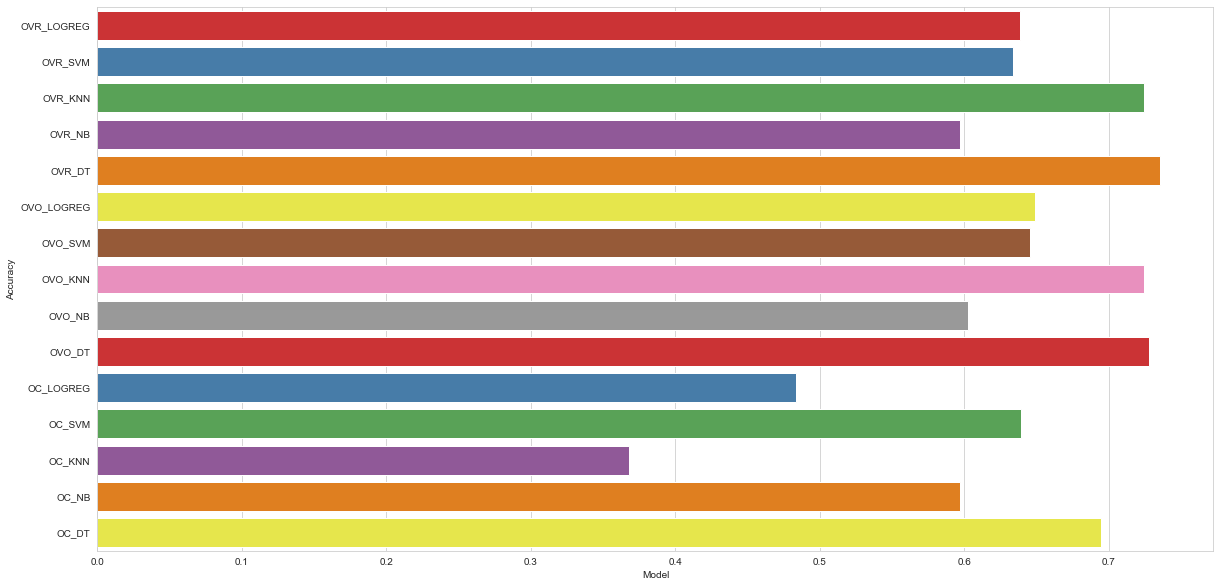

In [46]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1.05, 0.05))

sns.barplot(x=list(results.values()), y=list(results.keys()), palette=sns.color_palette("Set1", len(times)))
plt.show()

### Время

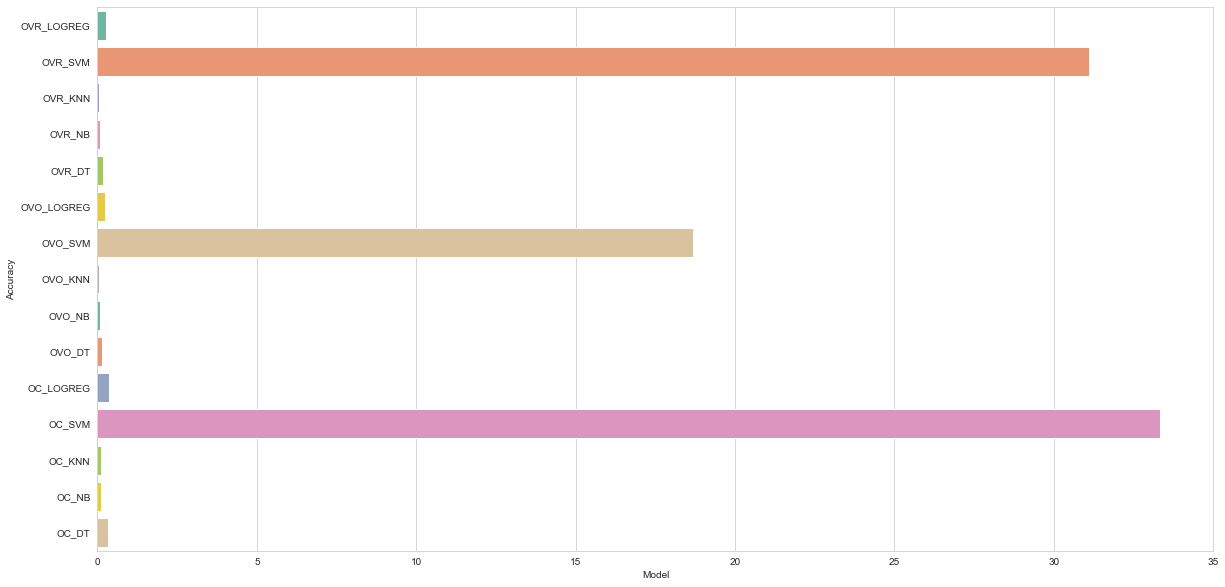

In [47]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1.05, 0.05))

sns.barplot(x=list(times.values()), y=list(times.keys()), palette=sns.color_palette("Set2", len(times)))
plt.show()

## Выводы об обученных моделях датасета

Наилучшей точности удалось достичь применяя стратегии **OneVsRest** и **OneVsOne** совместно с моделями **DT** и **KNN**. При этом **KNN** вместе с **OutputCode** стратегией показала наихудший результат. 
Говоря о времени выполнения, наилучшая скорость оказалась у стратегии **OneVsOne**. Дольше всего работала стратегия **OutputCode**. Модель **SVM** совсем не годится для получения быстрых результатов.

## Multioutput Regression

Описание датасета

- u_q: q component of Voltage measured in Volts0
- u_d: d component of Voltage measured in Volts
- i_q: q component of Current measured in Amps
- i_d: d component of Current measured in Amps
- ambient: ambient temperature around the stator in °C (measured by a thermal sensor fixed close to stator)
- coolant: motor coolant (water in this case) temperature of the motor in °C (measured by a fixed thermal sensor at coolant outlet)
- motor speed: ambient temperature around the stator in °C (measured by a fixed thermal sensor)
- stator_tooth: stator tooth temperature in °C
- stator_winding: stator winding temperature in °C
- stator_yoke: stator yoke temperature in °C
- pm: permanent magnet tooth temperature in °C
- torque: a force that tends to cause rotation
- profile_id: id of the measurement session

Наиболее интересными целевыми характеристиками являются температура ротора («pm»), температура статора («stator_*») и крутящий момент (torque).

In [8]:
df = pd.read_csv('/Users/sergioramos4/Downloads/measures_v2.csv')
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [9]:
df = df.drop('profile_id', axis=1)

## Первичный анализ признаков

In [10]:
df.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
dtype: int64

Посмотрим статистику по целевым признакам

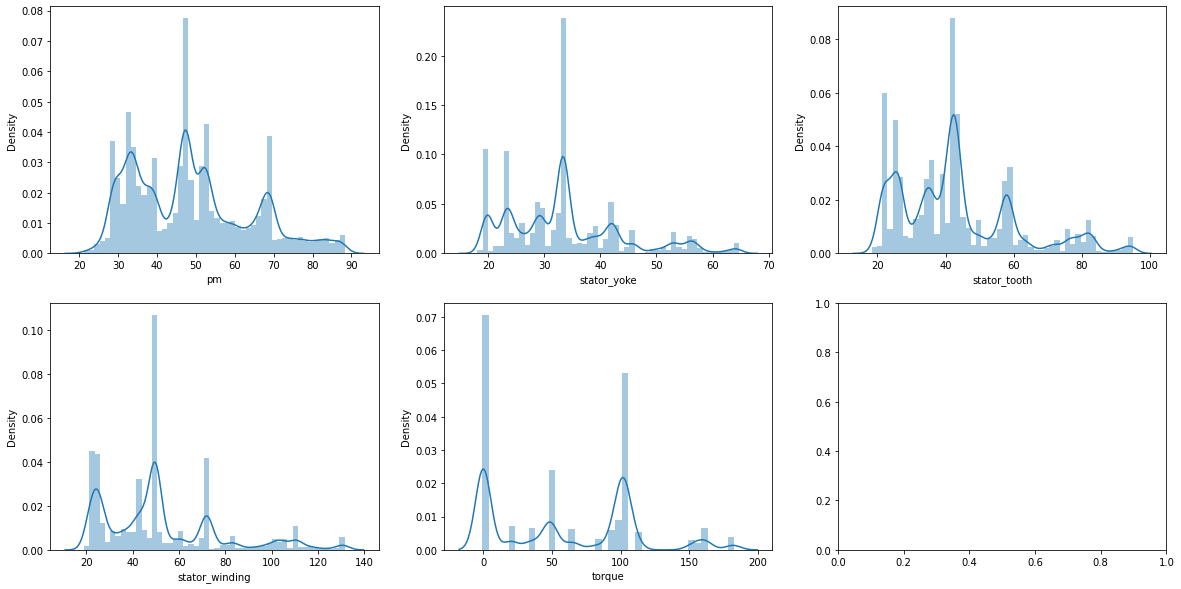

In [16]:
_, ax = plt.subplots(2, 3, figsize=(20,10))
sns.distplot(df['pm'], ax=ax[0,0])
sns.distplot(df['stator_yoke'], ax=ax[0,1])
sns.distplot(df['stator_tooth'], ax=ax[0,2])
sns.distplot(df['stator_winding'], ax=ax[1,0])
sns.distplot(df['torque'], ax=ax[1,1])
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

Статистика по остальным признакам

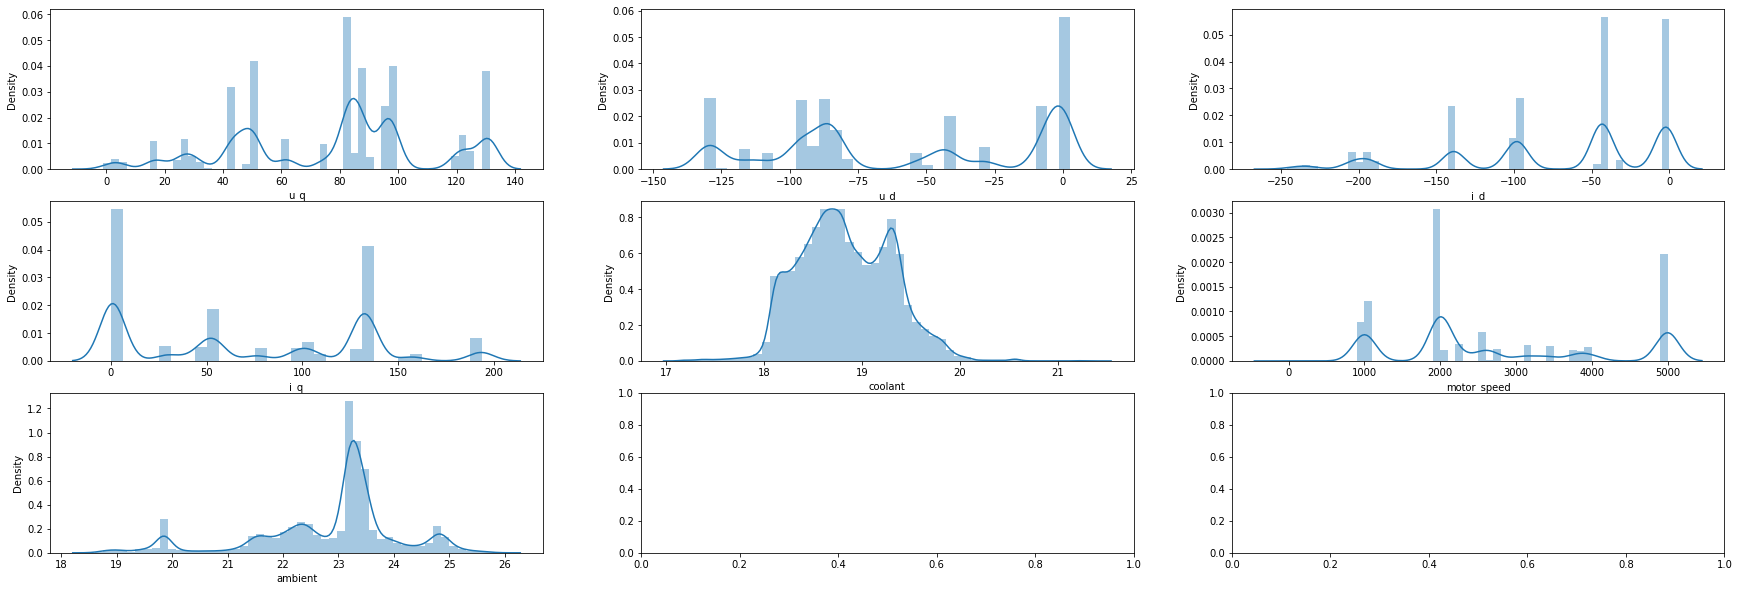

In [17]:
_, ax = plt.subplots(3, 3, figsize=(30,10))
sns.distplot(df['u_q'], ax=ax[0,0])
sns.distplot(df['u_d'], ax=ax[0,1])
sns.distplot(df['i_d'], ax=ax[0,2])
sns.distplot(df['i_q'], ax=ax[1,0])
sns.distplot(df['coolant'], ax=ax[1,1])
sns.distplot(df['motor_speed'], ax=ax[1,2])
sns.distplot(df['ambient'], ax=ax[2,0])
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

### Корреляция признаков

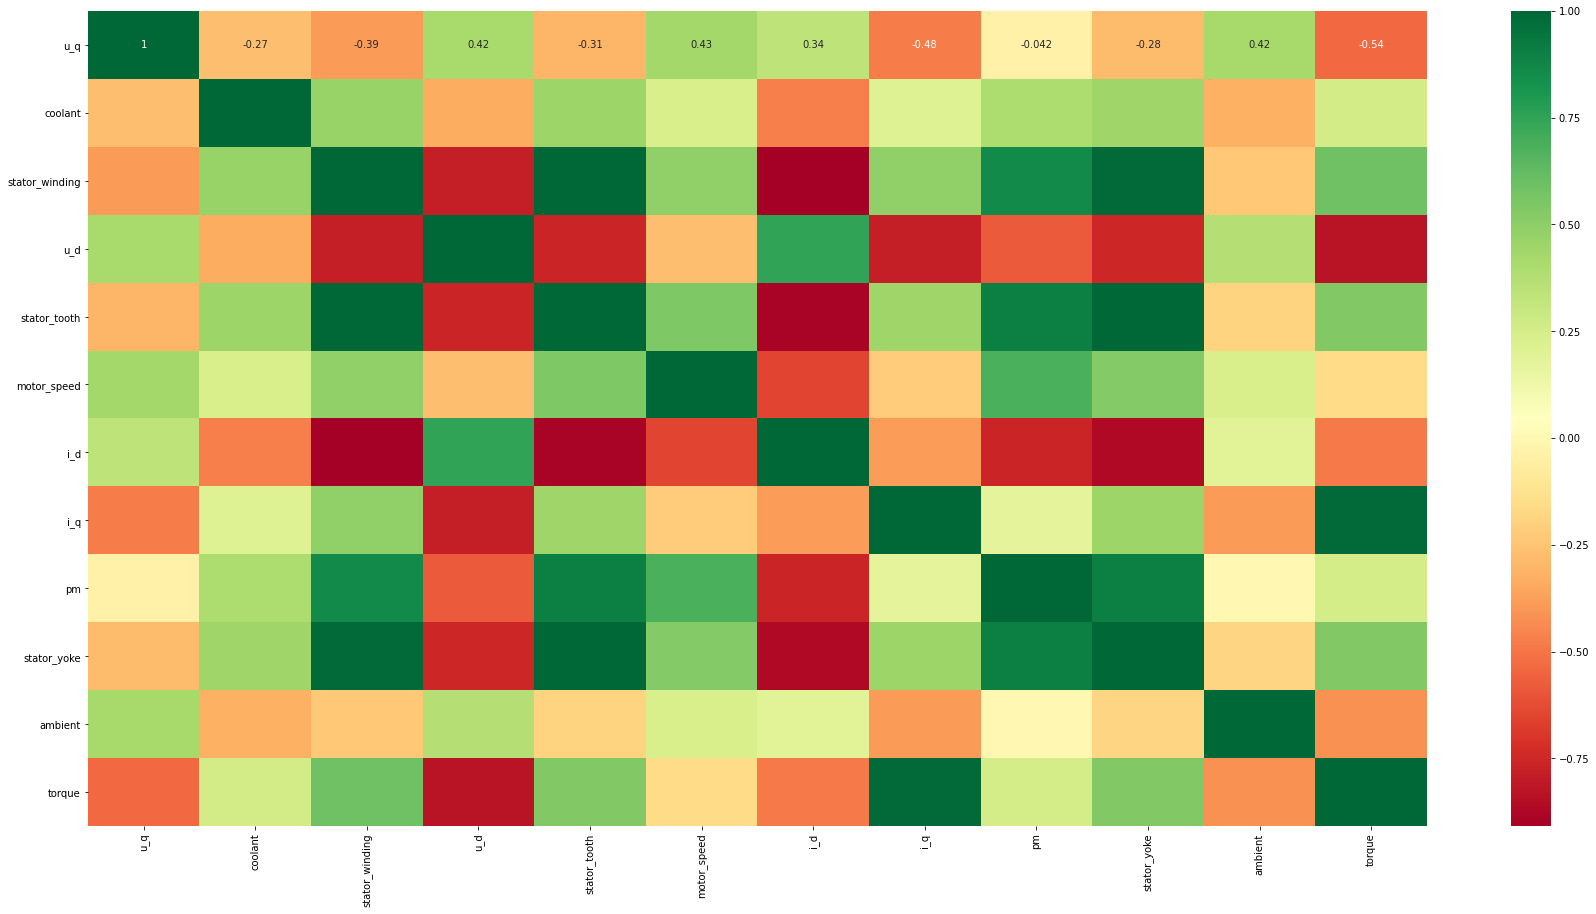

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(30, 15)
plt.show()

### Распределение данных

In [4]:
from sklearn.model_selection import train_test_split

y = df[['pm', 'stator_yoke', 'stator_tooth', 'stator_winding', 'torque']]
x = df.drop(columns=['pm', 'stator_yoke', 'stator_tooth', 'stator_winding', 'torque'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Масштабирование признаков

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x.columns)
x_train.head()

,u_q,coolant,u_d,motor_speed,i_d,i_q,ambient
0,0.577034,-1.556023,1.221392,-0.506069,1.061242,-1.124230,0.518462
1,1.608034,-0.377286,1.092853,1.602717,-0.343330,-1.126779,0.742062
2,0.161634,-1.227137,-0.577434,-0.506067,0.431978,0.988814,0.578417
3,0.585183,-0.750355,1.226510,-0.506067,1.061215,-1.124230,0.480565
4,-0.843751,-0.189698,1.227622,-1.208998,1.061260,-1.124229,0.369936


### Подбор наилучших признаков

In [6]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

rfecv = RFECV(estimator=LinearRegression())
rfecv.fit(x, y)

print("Наилучшее количество признаков -", rfecv.n_features_)
print("Наиболее подходящие признаки -", x_train.columns[rfecv.support_])

Наилучшее количество признаков - 5
Наиболее подходящие признаки - Index(['coolant', 'u_d', 'i_d', 'i_q', 'ambient'], dtype='object')


In [7]:
unsuitableParams = set(df.columns) - set(['coolant', 'u_d', 'i_d', 'i_q', 'ambient',
                                         'pm', 'stator_yoke', 'stator_tooth', 'stator_winding', 'torque'])

x_train = x_train.drop(columns=unsuitableParams)
x_test = x_test.drop(columns=unsuitableParams)

### Подбор гиперпараметров

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha_grid = np.logspace(-3, 3, 100)
tol_grid = np.logspace(-3, 3, 10)

searcher = GridSearchCV(
    Ridge(),
    [{"alpha": alpha_grid, "tol": tol_grid}],
    scoring="neg_root_mean_squared_error",
    cv=5,
)
searcher.fit(x_train, y_train)

best_alpha = searcher.best_params_["alpha"]
best_tol = searcher.best_params_["tol"]

print("Alpha = %.4f" % best_alpha)
print("Tol = %.4f" % best_tol)

Alpha = 0.4037
Tol = 0.0010


## Тесты

In [8]:
from sklearn.model_selection import cross_validate
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.metrics import r2_score

results = {}
times = {}

### MultiOutputRegressor

In [11]:
mor = MultiOutputRegressor(Ridge(alpha=best_alpha, tol=best_tol))
mor.fit(x_train.to_numpy(), y_train.to_numpy())
result = r2_score(y_test, mor.predict(x_test))
time = cross_validate(mor, x_train, y_train, cv=5)["fit_time"].mean()

results["MOR_RIDGE"] = result
times["MOR_RIDGE"] = time

print(f"result: {result}")
print(f"time: {time}")

result: 0.8244849192423388
time: 0.021588706970214845


## RegressorChain

In [12]:
rc = RegressorChain(Ridge(alpha=0.4037, tol=0.0010))
rc.fit(x_train.to_numpy(), y_train.to_numpy())
result = r2_score(y_test, rc.predict(x_test))
time = cross_validate(rc, x_train, y_train, cv=5)["fit_time"].mean()

results["RC_RIDGE"] = result
times["RC_RIDGE"] = time

print(f"result: {result}")
print(f"time: {time}")

result: 0.8244849192420807
time: 0.025885772705078126


## Сравнение моделей

### Точность

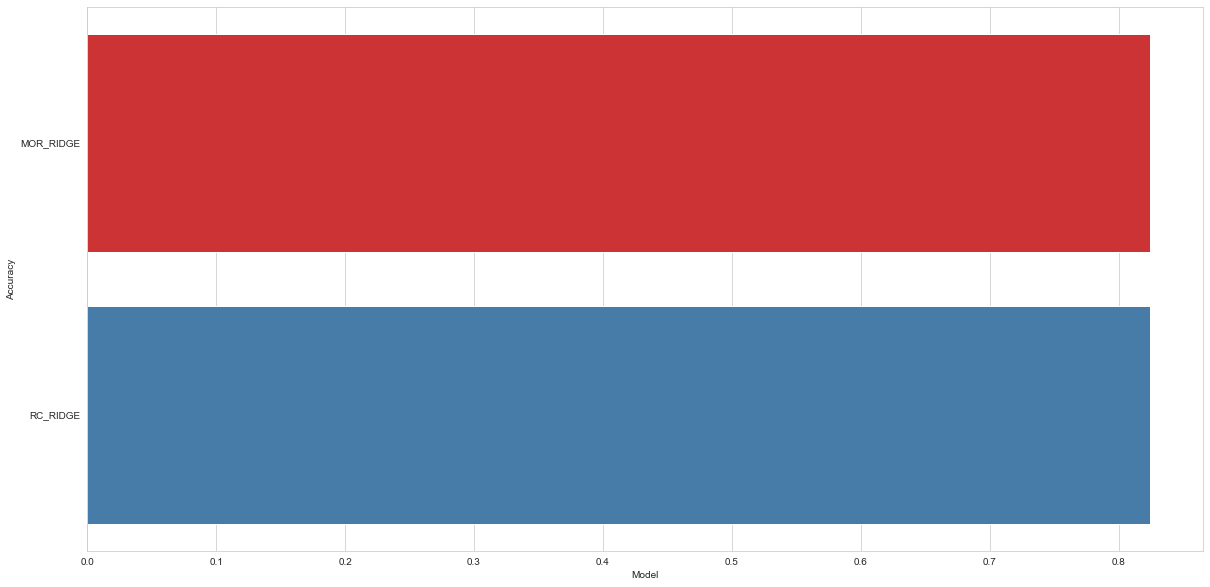

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1.05, 0.05))

sns.barplot(x=list(results.values()), y=list(results.keys()), palette=sns.color_palette("Set1", len(times)))
plt.show()

### Время

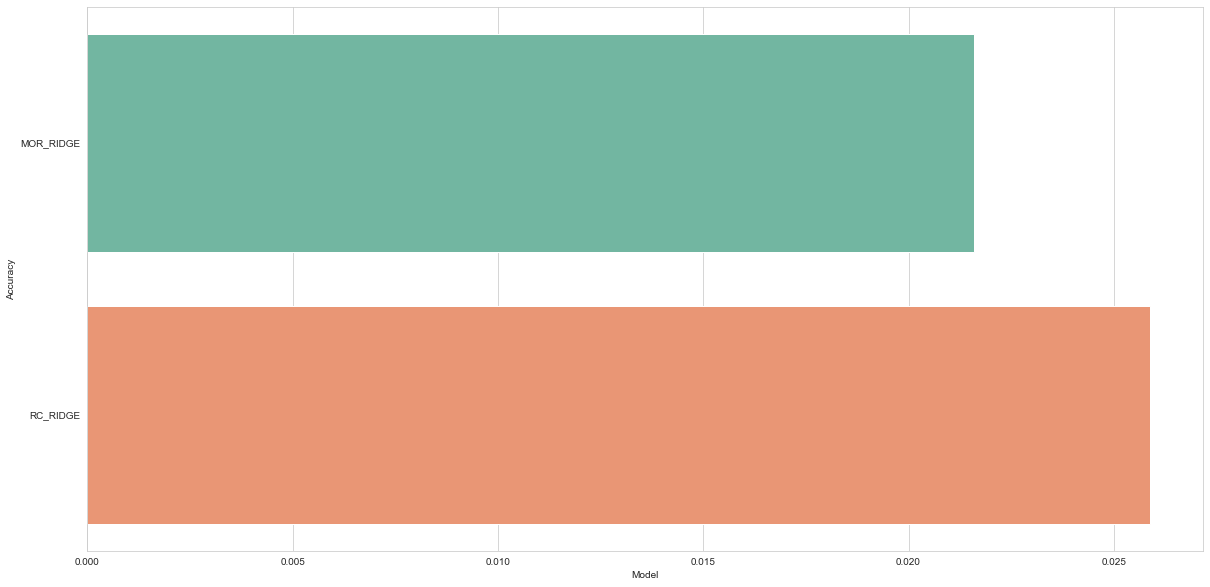

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1.05, 0.05))

sns.barplot(x=list(times.values()), y=list(times.keys()), palette=sns.color_palette("Set2", len(times)))
plt.show()

## Выводы

Обе модели показывают практически идентичную точность. При этом MultiOutputRegressor выполняется на 16% быстрее.